In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

city = 'gdansk'
url = 'https://www.olx.pl/nieruchomosci/mieszkania/sprzedaz/{}/?page='.format(city)

columns = ['Title', 'Price', 'Sq_Footage', 'Price_Per_Meter']
df = pd.DataFrame(columns=columns)
cards = None

In [27]:
sq_footages = []

pages = 15
for page_index in range(pages):
	next_url = url + str(page_index + 1)
	response = requests.get(next_url)

	if response.status_code == 200:
		soup = BeautifulSoup(response.text, 'html.parser')
		cards = soup.find_all('div', {'data-cy': 'l-card'})

	for card in cards:
		title = card.find('h6').text
		price = card.find('p').text
		price = float(price[:price.index('z')].replace(' ', ''))
		sq_footage_data = card.find('span', {'class': 'css-643j0o'}).text
		sq_footage = float(sq_footage_data[:sq_footage_data.index('m') - 1].replace(',', '.'))
		price_per_meter = float(sq_footage_data[sq_footage_data.index('-') + 1 : sq_footage_data.index('z') - 1])

		df.loc[len(df)] = [title, price, sq_footage, price_per_meter]

In [28]:
df

,Title,Price,Sq_Footage,Price_Per_Meter
0,Nadmorski apartament 2-pokojowy - Przystań Let...,757000.0,43.20,17523.15
1,Mieszkanie po remoncie blisko Centrum - polecam,559000.0,44.85,12463.77
2,72 m2 Mieszkanie w samym sercu Wrzeszcza,990000.0,71.00,13943.66
3,Od Zaraz | Przestrzenne | Blisko Lasu,869000.0,63.96,13586.62
4,Widok na morze | Blisko do Plaży | Przymorze,2400000.0,82.00,29268.29
...,...,...,...,...
1488,"Dwupoziomowe - 6 pokoi -131,5m2",1190000.0,131.50,9049.43
1489,Mieszkanie 3 pokojowe z halą garażową/Gdańsk C...,759000.0,52.28,14517.98
1490,Sprzedam Praktyczne 4-pokojowe Mieszkanie w Gd...,849895.0,63.77,13327.51
1491,"3/4 pok. ogród taras widoki, ok. 70 m całkowita",999000.0,70.00,14271.43


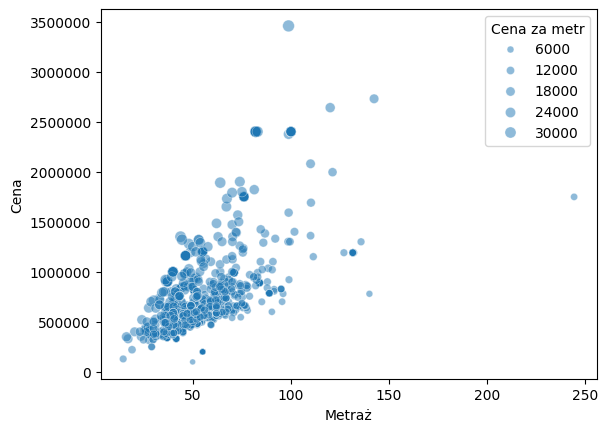

In [52]:
import seaborn as sns
scatter_plot = sns.scatterplot(data=df, x=df['Sq_Footage'], y=df['Price'], size=df['Price_Per_Meter'], alpha=0.5)
scatter_plot.legend(title='Cena za metr')
scatter_plot.set(xlabel='Metraż', ylabel='Cena')
scatter_plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show()